# Monte Carlo Methods

## Announcements

 - Lab this week, but no lab next week!
 - HW Due today
 - Lesson 15 grading went weird.  I'm waiting for tech support to fix it.


In [1]:
import numpy as np
from math import pi,isclose

def mc_pi( n ):
    atol = 10 ** -n

    # Initialize values
    pi_guess = 0
    n_circle = 0
    n_total  = 0

    # Loop until desired number of significant figures after the
    # decimal place have been calculated.
    while not isclose( pi_guess,pi,abs_tol=atol ):
        x,y = np.random.uniform( size=(2,) ) * 2 - 1
        if ( x**2 + y**2 ) ** 0.5 < 1.0:
            n_circle += 1
        n_total += 1
        pi_guess = n_circle / n_total * 4.0
    return pi_guess


In [4]:
mc_pi(6)

3.141592049591656

In [5]:
def r_pi(n):
    atol = 10 ** -n
    pi_guess = 0
    while not isclose(pi_guess,pi,abs_tol = atol):
        pi_guess = np.random.uniform() * 6
    return pi_guess

In [6]:
r_pi(5)

3.1415923053313755

In [2]:
def mc_pi_no_cheating( n ):
    atol = 10 ** -n

    # Initialize values
    pi_guess = 0
    old_pi_guess = 1000
    n_circle = 0
    n_total  = 0

    # Loop until desired number of significant figures after the
    # decimal place have been calculated.
    while True:
        x,y = np.random.uniform( size=(2,) ) * 2 - 1
        if ( x**2 + y**2 ) ** 0.5 < 1.0:
            n_circle += 1
        n_total += 1
        old_pi_guess = pi_guess
        pi_guess = n_circle / n_total * 4.0
        if n_total > 100 and isclose( pi_guess,old_pi_guess,abs_tol=atol ):
            break
    return pi_guess


In [6]:
mc_pi_no_cheating(6)

3.141590683250797

In [ ]:
mc_pi_no_cheating(5)

## Finding the area under the curve without integration!

In [2]:
def area(f,a,b,n):
    atol = 10 ** -n

    # Initialize values
    guess = 0
    old_guess = 1000
    n_under = 0
    n_total  = 0

    # Loop until desired number of significant figures after the
    # decimal place have been calculated.
    while True:
        x = np.random.uniform() * (b-a) + a
        y = np.random.uniform()
        if y <= f(x):
            n_under += 1
        n_total += 1
        old_guess = guess
        guess = n_under / n_total
        print(guess,old_guess)
        if n_total > 100 and isclose( guess,old_guess,abs_tol=atol ):
            break
    return guess * (b-a)


In [3]:
import numpy
area(numpy.cos,0,1,3)

1.0 0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.9 1.0
0.9090909090909091 0.9
0.9166666666666666 0.9090909090909091
0.9230769230769231 0.9166666666666666
0.8571428571428571 0.9230769230769231
0.8666666666666667 0.8571428571428571
0.875 0.8666666666666667
0.8823529411764706 0.875
0.8888888888888888 0.8823529411764706
0.8947368421052632 0.8888888888888888
0.9 0.8947368421052632
0.9047619047619048 0.9
0.9090909090909091 0.9047619047619048
0.9130434782608695 0.9090909090909091
0.9166666666666666 0.9130434782608695
0.92 0.9166666666666666
0.9230769230769231 0.92
0.9259259259259259 0.9230769230769231
0.8928571428571429 0.9259259259259259
0.896551724137931 0.8928571428571429
0.9 0.896551724137931
0.9032258064516129 0.9
0.90625 0.9032258064516129
0.8787878787878788 0.90625
0.8823529411764706 0.8787878787878788
0.8857142857142857 0.8823529411764706
0.8888888888888888 0.8857142857142857
0.8918918918918919 0.8888888888888888
0.8947368421052632 0.8918918918918919
0.897435897

0.8561643835616438

In [15]:
r_pi(6)

3.141593565028728

      fun: 1.3011813848606835e-13
 hess_inv: array([[0.99955719]])
      jac: array([5.21540642e-07])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([5.10165761e-07])


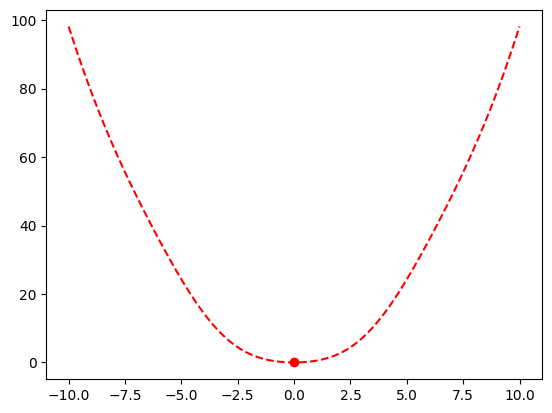

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def f( x ):
    return x**2 + np.cos(x) - 1

x = np.linspace( -10,10,1000 )
xstar = scipy.optimize.minimize( f,x0=3 )
print(xstar)
plt.plot( x,f( x ),'r--', xstar[ 'x' ],f( xstar[ 'x' ] ),'ro' )
plt.show()

In [13]:
def dfdx( f,x,h=1e-3 ):
    return ( f( x+h ) - f( x ) ) / h

def newton( f,x0,tol=1e-3 ):
    d = abs( 0 - f( x0 ) )
    while d > tol:
        x0 = x0 - f( x0 ) / dfdx( f,x0 )
        d = abs( 0 - f( x0 ) )
    return ( x0,f( x0 ) )


## Fun fact!

$e^{i \pi} + 1 = 0$ because $e^{x \pi} = cos(x) + i sin(x)$

In [21]:
import numpy
3+2j

(3+2j)

In [25]:
numpy.e ** (numpy.pi * 1j) + 1

1.2246467991473532e-16j